<a href="https://colab.research.google.com/github/Siryeong/MachineLearning/blob/main/ml_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML_HW5 21600724 Siryeong Choi

In [2]:
### data Download

!wget http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz

--2021-10-17 19:42:28--  http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz
Resolving www.iro.umontreal.ca (www.iro.umontreal.ca)... 132.204.26.36
Connecting to www.iro.umontreal.ca (www.iro.umontreal.ca)|132.204.26.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  42.5MB/s    in 0.4s    

2021-10-17 19:42:29 (42.5 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]



In [224]:
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
#import scipy.misc
from PIL import Image
from numpy import linalg as LA

import matplotlib.pyplot as plt

### definition
def load_data(dataset):
  ''' Loads the dataset

  :type dataset: string
  :param dataset: the path to the dataset (here MNIST)
  
  copied from http://deeplearning.net/ and revised by hchoi
  '''

  # Download the MNIST dataset if it is not present
  data_dir, data_file = os.path.split(dataset)
  if data_dir == "" and not os.path.isfile(dataset):
    # Check if dataset is in the data directory.
    new_path = os.path.join(
      os.path.split(__file__)[0],
      dataset
    )
    if os.path.isfile(new_path) or data_file == 'mnist.pkl.gz':
      dataset = new_path

  if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
    from six.moves import urllib
    origin = (
      'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
    )
    print('Downloading data from %s' % origin)
    urllib.request.urlretrieve(origin, dataset)

  print('... loading data')

  # Load the dataset
  with gzip.open(dataset, 'rb') as f:
    try:
      train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
    except:
      train_set, valid_set, test_set = pickle.load(f)
  return train_set, valid_set, test_set

In [225]:
### load data sets
train_set, val_set, test_set = load_data('mnist.pkl.gz')
train_x, train_y = train_set

print(train_x.shape)
print(train_y.shape)

idx = np.where(np.logical_or(train_y==3, train_y==9))
data_x = train_x[idx]
data_y = train_y[idx]
print(data_x.shape)
print(data_y.shape)

... loading data
(50000, 784)
(50000,)
(10089, 784)
(10089,)


In [226]:
### visualiztion of result
def visualization(data, n_clusters, label):
  fig = plt.figure(1)
  box_index = 1
  for cluster in range(n_clusters):
    result = data[np.where(label == cluster)]
    for i in range(10):
      ax = fig.add_subplot(n_clusters, 10, box_index)
      plt.imshow(result[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      box_index += 1
  plt.show()

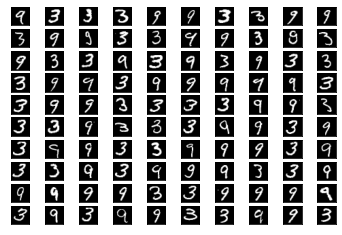

In [227]:
### check head of data
fig = plt.figure(1)
box_index = 1
for i in range(100):
  ax = fig.add_subplot(10, 10, box_index)
  plt.imshow(data_x[i].reshape(28, 28)*255.9)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  box_index += 1
plt.show()

In [228]:
### kmeans Implementation
def myKmeans(n_clusters, data):
  ### random n cluster
  tmp = [i for i in range(len(data))]
  idx = np.random.choice(tmp, size=n_clusters, replace=False)
  cluster_list = data[idx]

  ### clustering
  labels = np.zeros(len(data))
  while(True):
    for i in range(len(data)):
      norm = [LA.norm(cluster_list[j] - data[i]) for j in range(n_clusters) ]
      labels[i] = np.argmin(norm)
    cluster_list_tmp = [np.mean(data[np.where(labels==i)]) for i in range(n_clusters)]
    if(np.array_equal(cluster_list, cluster_list_tmp)):
      break
    cluster_list = cluster_list_tmp
  
  return labels

### Raw Images

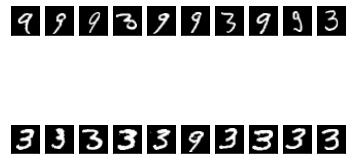

In [229]:
label = myKmeans(2, data_x)
visualization(data_x, 2, label)

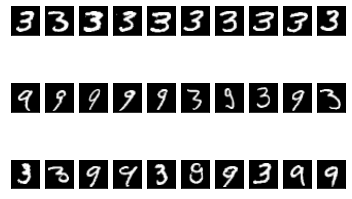

In [230]:
label = myKmeans(3, data_x)
visualization(data_x, 3, label)

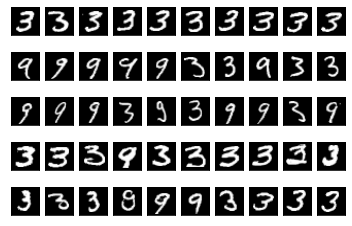

In [231]:
label = myKmeans(5, data_x)
visualization(data_x, 5, label)

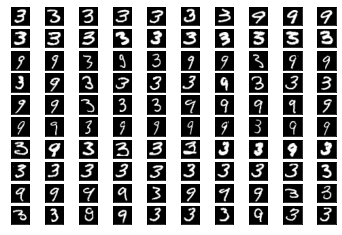

In [232]:
label = myKmeans(10, data_x)
visualization(data_x, 10, label)

### 2D Space

In [233]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_2d = pca.fit_transform(data_x)
reduced_2d.shape

(10089, 2)

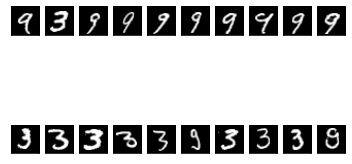

In [234]:
label = myKmeans(2, reduced_2d)
visualization(data_x, 2, label)

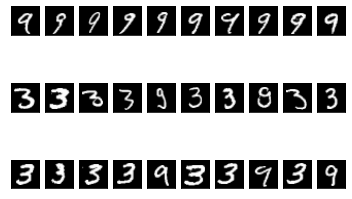

In [235]:
label = myKmeans(3, reduced_2d)
visualization(data_x, 3, label)

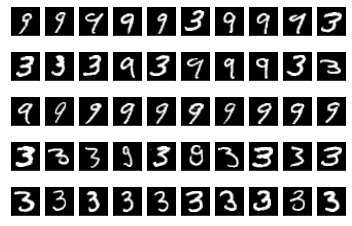

In [236]:
label = myKmeans(5, reduced_2d)
visualization(data_x, 5, label)

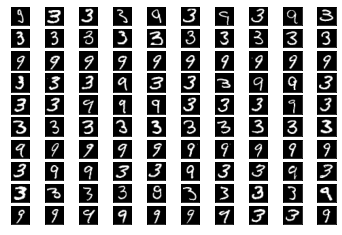

In [237]:
label = myKmeans(10, reduced_2d)
visualization(data_x, 10, label)

### 5D Space

In [238]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
reduced_5d = pca.fit_transform(data_x)
reduced_5d.shape

(10089, 5)

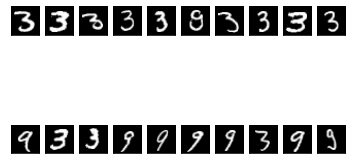

In [243]:
label = myKmeans(2, reduced_5d)
visualization(data_x, 2, label)

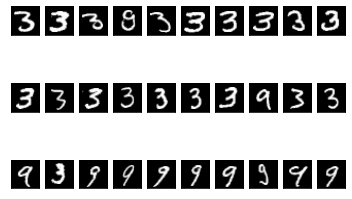

In [244]:
label = myKmeans(3, reduced_5d)
visualization(data_x, 3, label)

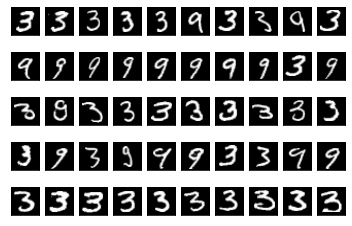

In [245]:
label = myKmeans(5, reduced_5d)
visualization(data_x, 5, label)

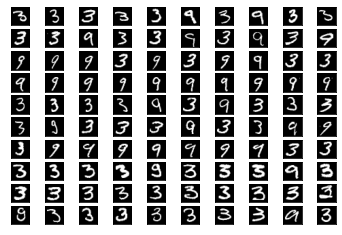

In [246]:
label = myKmeans(10, reduced_5d)
visualization(data_x, 10, label)

### 10D Space

In [247]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
reduced_10d = pca.fit_transform(data_x)
reduced_10d.shape

(10089, 10)

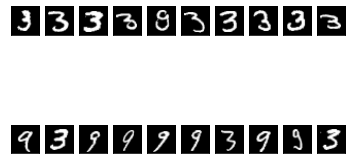

In [248]:
label = myKmeans(2, reduced_10d)
visualization(data_x, 2, label)

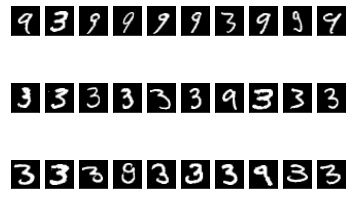

In [252]:
label = myKmeans(3, reduced_10d)
visualization(data_x, 3, label)

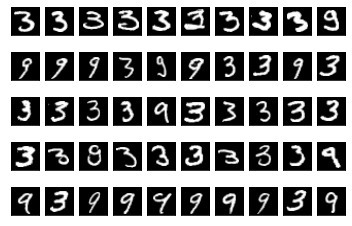

In [253]:
label = myKmeans(5, reduced_10d)
visualization(data_x, 5, label)

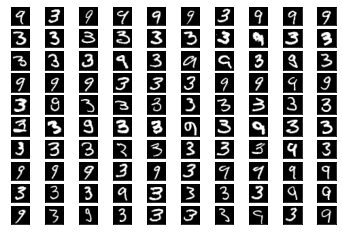

In [254]:
label = myKmeans(10, reduced_10d)
visualization(data_x, 10, label)